<a href="https://colab.research.google.com/github/dspark0419/DATA-201/blob/main/Project_1_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [2]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks')

## **Dataset**
The dataset '**insurance.csv**' was created using demographic statistics from the U.S. Census Bureau. It has about 1300 records.

**Source:** https://www.kaggle.com/mirichoi0218/insurance

## **Column Infomation**

age: Age of primary beneficiary  
sex: Insured's sex: female, male  
bmi: Body mass index (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  
children: Number of children covered by health insurance / Number of dependents  
smoker: yes or no  
region: The beneficiary's residential area in the US: northeast, southeast, southwest, northwest  
charges: Individual medical costs billed by health insurance

## **Data Wrangling**

Importing the dataset and obtaining basic information

In [3]:
medCosts = pd.read_csv('insurance.csv')

In [4]:
medCosts.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medCosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking misssing values and then filling them by 'NA'

In [6]:
medCosts.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Data Visualiztion:** Investigating the medical costs ('charges')

Heat map for the correlations between quantatative variables: This plot indicates that the strongest correlation is betweeen charges and age (0.30).

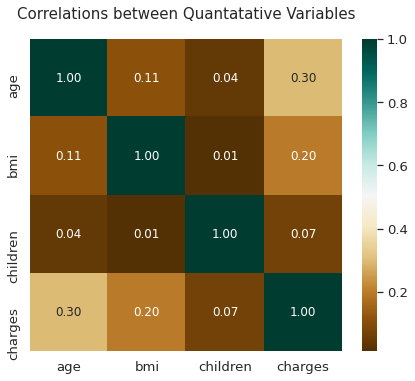

In [7]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=[7,7])
sns.heatmap(ax=ax, data=medCosts.corr(), annot=True, square=True,  fmt='.2f', 
            annot_kws={'size':12}, cbar_kws={"shrink": .82}, cmap='BrBG')
ax.set_title('Correlations between Quantatative Variables', size=15, pad=20)
plt.show()

Scatter and Line plots of 'charges' over 'age': The scatter and line plots show the correlation indicated by the heatmap above. Overall, charges seem to increase as age increases.  

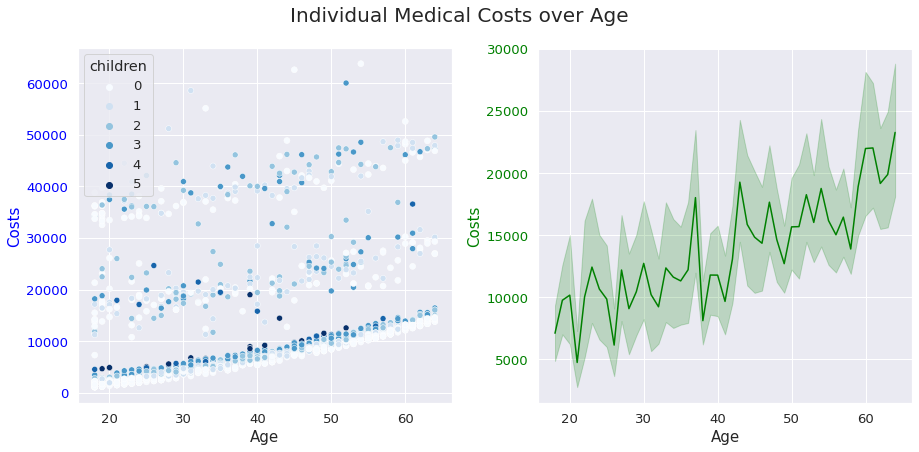

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13, 6])
fig.suptitle('Individual Medical Costs over Age', y=1.05, size=20)

sns.scatterplot(ax=ax1, data=medCosts, x='age', y='charges', hue='children', palette='Blues')
sns.lineplot(ax=ax2, data=medCosts, x='age', y='charges', color='green')

ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Costs', fontsize=15, color='blue')
ax1.tick_params('y', colors = 'blue')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Costs', fontsize=15, color='green')
ax2.tick_params('y', colors = 'green')

fig.tight_layout()
plt.show()

Medical costs over age grouped by decade: These boxplots show the median charges increase as age increases. It also shows the outliers within each age group.

In [9]:
medCosts['age_by_decade'] = pd.cut(x=medCosts['age'], bins=[-1, 19, 29, 39, 49, 59, 200], 
                                   labels=['20-','20s', '30s', '40s', '50s', '60+'])
medCosts['age_by_decade'].unique()

['20-', '20s', '30s', '40s', '60+', '50s']
Categories (6, object): ['20-' < '20s' < '30s' < '40s' < '50s' < '60+']

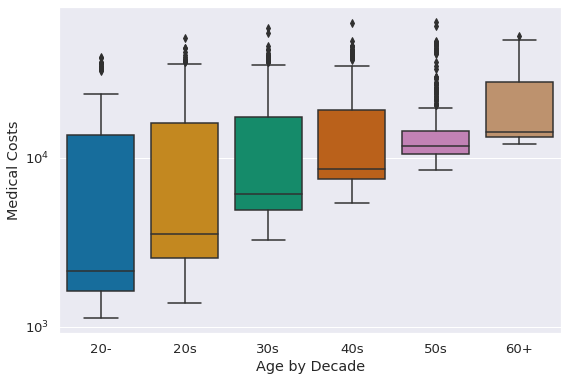

In [10]:
plt.figure(figsize=[9,6])
sns.boxplot(data=medCosts, x='age_by_decade', y='charges', palette='colorblind')
plt.xlabel('Age by Decade')
plt.ylabel('Medical Costs')
plt.yscale("log")
plt.show()

Average BMI and Costs over Age: These plots show that as age increases, there seems to be a trend between BMI and medical costs. Though there appears to be greater variation in BMI than medical costs.

In [11]:
by_age_mean = medCosts.groupby('age').mean()

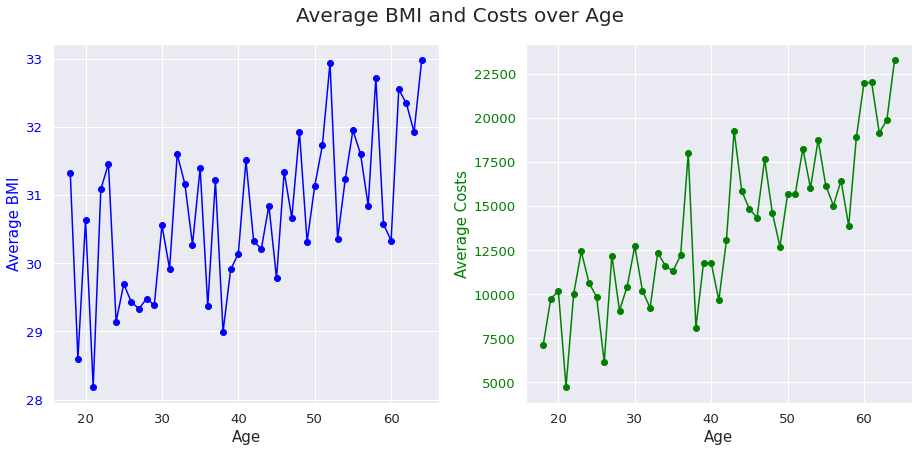

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[13,6])
fig.suptitle('Average BMI and Costs over Age', y=1.05, size=20)

ax1.plot(by_age_mean.index, by_age_mean['bmi'], color='blue', marker='o')
ax2.plot(by_age_mean.index, by_age_mean['charges'], color='green', marker='o')

ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Average BMI', fontsize=15, color='blue')
ax1.tick_params('y', colors = 'blue')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Average Costs', fontsize=15, color='green')
ax2.tick_params('y', colors = 'green')

fig.tight_layout()
plt.show()

Putting the two line plots on the same x-axis (without grouping) to see if there is relationship between BMI and medical costs over age

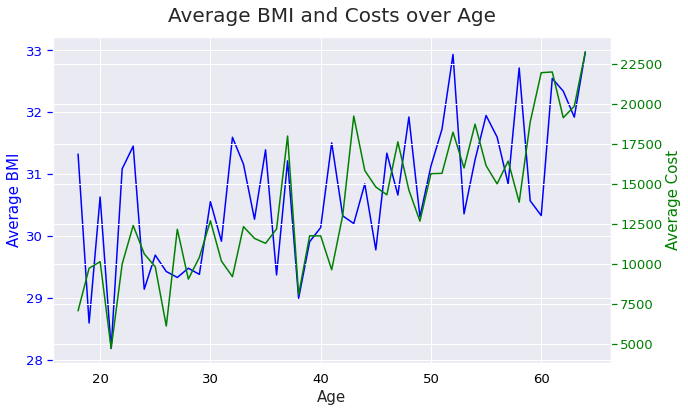

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
ax1 = ax.twinx()

sns.lineplot(ax=ax, data=medCosts, x='age', y='bmi', ci=None, color='blue')
sns.lineplot(ax=ax1, data=medCosts, x='age', y='charges', ci=None, color='green')

ax.set_title('Average BMI and Costs over Age', fontsize=20, pad=15)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Average BMI', color = 'blue', fontsize=15)
ax.tick_params('y', colors = 'blue')
ax.tick_params('x', colors = 'black')
ax1.set_ylabel('Average Cost', color = 'green', fontsize=15)
ax1.tick_params('y', colors = 'green')

plt.show()

Investigating medical costs over the number of children: Median costs decrease with the first child, and then increase until they decrease again with the fifth child.

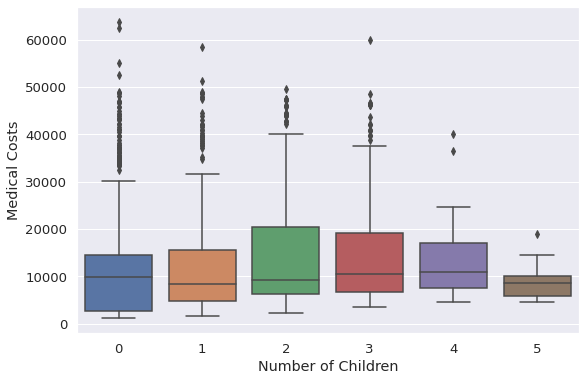

In [14]:
plt.figure(figsize=[9, 6])
sns.boxplot(data=medCosts, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Medical Costs')
plt.show()

Density functions of Medical costs by 'sex'

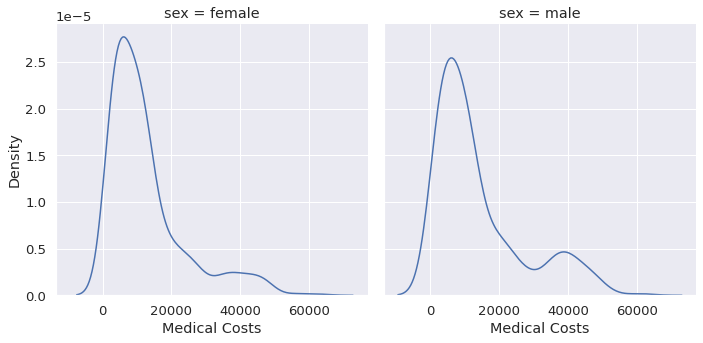

In [15]:
g = sns.displot(data=medCosts, x='charges', kind='kde', col='sex', col_wrap=2)
g.set(xlabel='Medical Costs')
plt.show()

Medical costs by 'smoker' status: Not surprisingly, smokers' median costs are much higher than non-smokers' median.

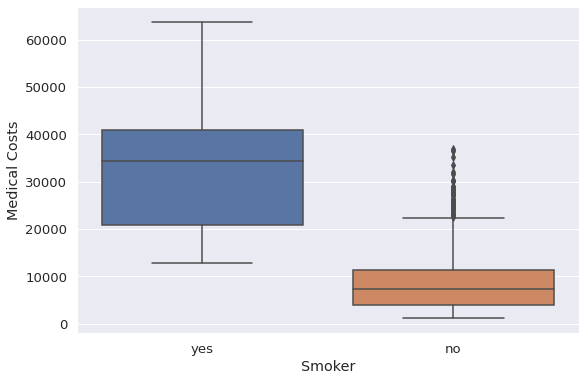

In [16]:
plt.figure(figsize=[9, 6])
sns.boxplot(data=medCosts, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Medical Costs')
plt.show()

Bar and Box plots of 'charges' by 'region'

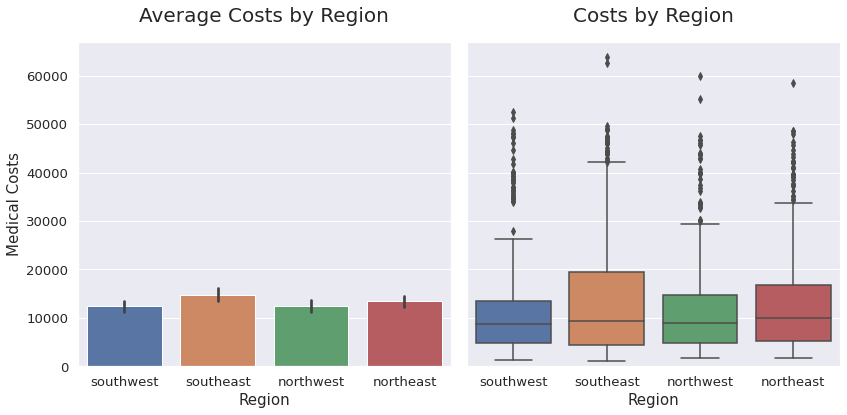

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6], sharex=True, sharey=True)
sns.barplot(ax=ax1, data=medCosts, x='region', y='charges')
sns.boxplot(ax=ax2, data=medCosts, y='charges', x='region')
ax1.set_title('Average Costs by Region', fontsize=20, pad=20)
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('Medical Costs', fontsize=15)
ax2.set_title('Costs by Region', fontsize=20, pad=20)
ax2.set_xlabel('Region', fontsize=15)
ax2.set_ylabel(None)
fig.tight_layout()
plt.show()

Bar and Box plots of 'charges' by 'region' grouped by 'sex'

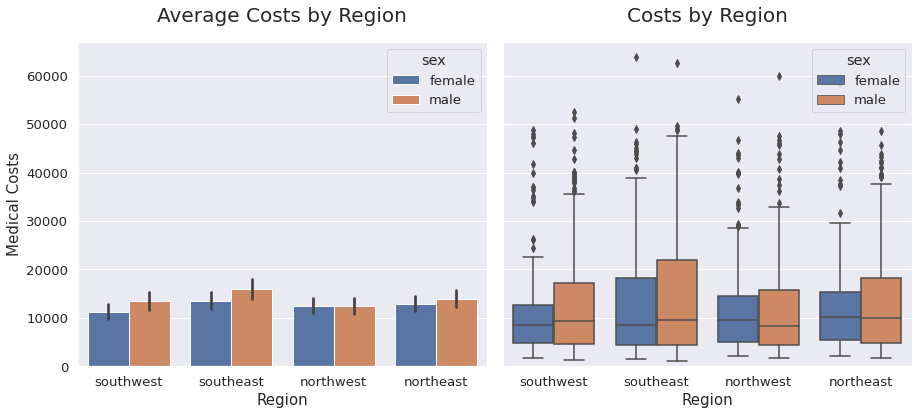

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13, 6], sharex=True, sharey=True)
sns.barplot(ax=ax1, data=medCosts, x='region', y='charges', hue='sex')
sns.boxplot(ax=ax2, data=medCosts, y='charges', x='region', hue='sex')
ax1.set_title('Average Costs by Region', fontsize=20, pad=20)
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('Medical Costs', fontsize=15)
ax2.set_title('Costs by Region', fontsize=20, pad=20)
ax2.set_xlabel('Region', fontsize=15)
ax2.set_ylabel(None)
fig.tight_layout()
plt.show()

## **Simulating Median Costs**

Simulation of a nonparametric inference of the median for the quantitative variable 'charges'

In [19]:
medCosts['charges'].median()

9382.033

Bootstrap sampling for the median of the variable 'charges' after selecting a sample of size 150 from the data

In [20]:
medCosts_sample = medCosts.sample(n=150, random_state=6)
original_sample = medCosts_sample['charges']
median_boot_samples = []
np.random.seed(66)
for i in range(1000):
  boot_sample = np.random.choice(original_sample, 150)
  median_boot_samples.append(np.median(boot_sample))

In [21]:
original_sample.median()

10158.67295

Constructing a 95% confidence interval for the column 'charges': Notice that the interval contains both the median of the variable 'charges' for the data and the original sample median.

In [22]:
conf_int = np.percentile(median_boot_samples, [2.5, 97.5])
conf_int

array([ 8538.28845 , 11900.502925])